# Imports

In [1]:
import pyaudio
import numpy as np
from IPython.display import clear_output
from w_model import AModel, feature_exctractor
import time

# Script for working with a microphone in real time

In [ ]:
CHUNK = 4096 # number of data points to read at a time
RATE = 44100 # time resolution of the recording device (Hz)
DEVICE = 1 # default
 
p = pyaudio.PyAudio()
model = AModel()
 
stream=p.open(format=pyaudio.paInt32,
              channels=2,
              rate=RATE,
              input=True,
              frames_per_buffer=CHUNK,
              input_device_index=DEVICE)

# Optional list for plotting
to_plot = []

st = 0


# Main Loop
while st < 30:
    time.sleep(0.5)
    indata = np.fromstring(stream.read(CHUNK),dtype=np.int32)
 
    # Take the fft and square each value
    fftData=abs(np.fft.rfft(indata))**2

    to_plot.append(np.std(fftData))
    which = fftData[1:].argmax() + 1
    
    res = model.dpredict(fftData[1:])
    print(res)
    
    st += 1

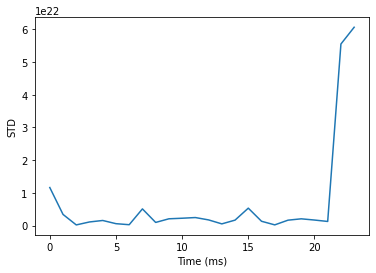

In [5]:
import matplotlib.pyplot as plt 

plt.xlabel('Time (ms)')
plt.ylabel('STD')
plt.plot(to_plot)